<a href="https://colab.research.google.com/github/kwanhong66/TodayILearned/blob/master/kaggle/Kaggle_ML_DS_survey_2017_EDA_FAQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import packages

In [0]:
# 노트북 안에서 그래프를 그리기 위해서
%matplotlib inline

# Import the standard libs
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Igonre warnings
import warnings
warnings.filterwarnings('ignore')

import os

### Connect Google drive

In [3]:
# Connect with Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
data_root_dir = '/content/drive/My Drive/Colab Notebooks/data'

### Read data csv

In [5]:
# load multiple choice question csv
mcq = pd.read_csv(os.path.join(data_root_dir, 'kaggle-survey-2017/multipleChoiceResponses.csv'),
                                    encoding='ISO-8859-1', low_memory=False)
mcq.shape

(16716, 228)

In [6]:
question = pd.read_csv(os.path.join(data_root_dir, 'kaggle-survey-2017/schema.csv'))
question.shape

(290, 3)

## FAQ

###Q1. Python과 R중 어떤 언어를 배워야 할까요?

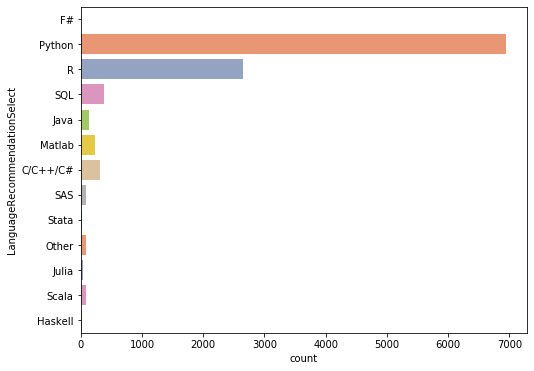

In [0]:
plt.figure(figsize=(8,6))
sns.countplot(y='LanguageRecommendationSelect', data=mcq, palette='Set2')

- Python이 압도적으로 선호도가 높음

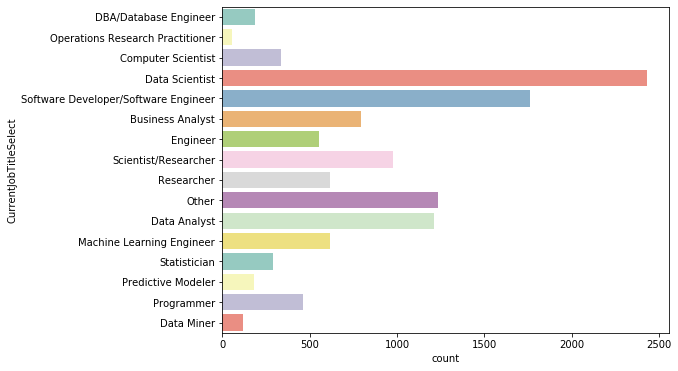

In [0]:
# Current Job
plt.figure(figsize=(8,6))
sns.countplot(y=mcq['CurrentJobTitleSelect'], palette='Set3')

In [0]:
# 현재 직업 전체 응답수
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

(7158, 228)


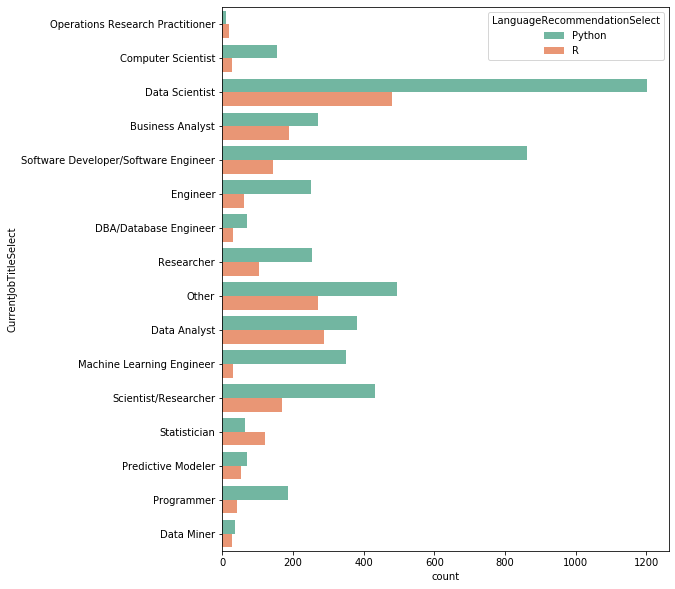

In [0]:
# 현재 하는 일에 대한 응답한 사람 중, Python과 R을 사용하는 사람
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (
    (mcq['LanguageRecommendationSelect'] == 'Python') | 
    (mcq['LanguageRecommendationSelect'] == 'R'))]
print(data.shape)
data.head(5)
plt.figure(figsize=(8, 10))
sns.countplot(y='CurrentJobTitleSelect',
              hue='LanguageRecommendationSelect',
              data=data,
              palette='Set2')

### Q2. 데이터 사이언스 분야에서 앞으로 크게 주목받을 기술은?

- 데이터 사이언스 tool

In [0]:
mcq_ml_tool_count = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts()
)
mcq_ml_tool_percent = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize=True)
)

mcq_ml_tool_df = mcq_ml_tool_count.merge(
    mcq_ml_tool_percent, left_index=True, right_index=True
)
mcq_ml_tool_df.columns = ['응답 수', '비율']
mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


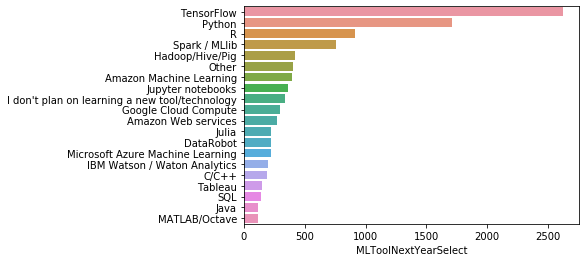

In [0]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)

- Google의 딥러닝 프레임워크인 Tensorflow가 23%, Python이 15%, R은 8%

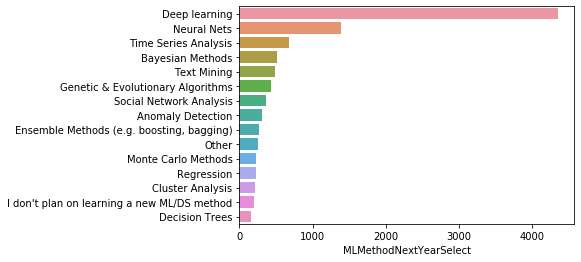

In [0]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

### Q3. 어디에서 데이터 사이언스를 배우나요?

In [0]:
# https://stackoverflow.com/questions/22697773/how-to-check-the-dtype-of-a-column-in-python-pandas/22697903
# apply_platform_list_split = mcq['LearningPlatformSelect'].astype(str).apply(lambda x: x.split(','))
# Platform name is splitted in column
# apply_platform_list_split[:5]

mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype(str).apply(lambda x: x.split(','))

# apply lambda to 'LearningPlatformSelect' colum to flatten list value
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html
# https://rfriend.tistory.com/276
# stack 함수로 Learning... column의 리스트(Series)를 col 기준으로 stacking
# https://datascienceschool.net/view-notebook/a49bde24674a46699639c1fa9bb7e213/
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html
# multi-index에 대한 reset_index(); level: 해당 level index만 떨굼 drop: index를 일반 col로 올리지 않고 떨굼
s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),
    axis=1
).stack().reset_index(level=1, drop=True)
s.head()

0    College/University
0           Conferences
0              Podcasts
0            Trade book
1                Kaggle
dtype: object

Kaggle                           6645
Online courses                   6042
Stack Overflow Q&A               5703
YouTube Videos                   5291
Personal Projects                4873
Blogs                            4828
Textbook                         4246
College/University               3397
Arxiv                            2418
Official documentation           2354
Conferences                      2217
Friends network                  1617
Tutoring/mentoring               1458
Podcasts                         1238
Non-Kaggle online communities    1169
dtype: int64


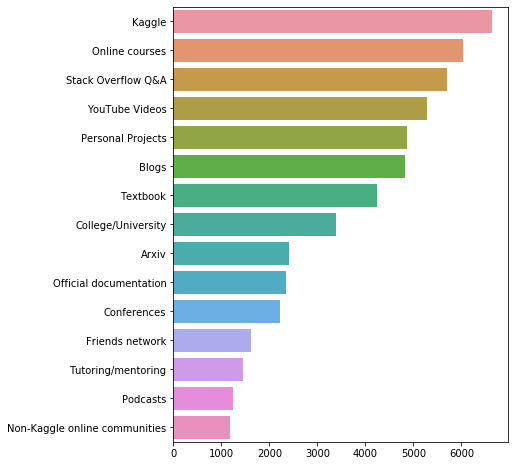

In [0]:
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts().head(15)
print(data)
sns.barplot(y=data.index, x=data)

- Kaggle은 응답자들 사이에서 가장 높은 선호도의 플랫폼
- 온라인 코스, 스택 오버플로우, 유튜브 등이 상위권

In [0]:
print(question['Column']) # 설문 항목
# LearningCategory라는 substring을 가진 column에 해당하는 내용 indexing
qc = question.loc[question['Column'].str.contains('LearningCategory')]
print(qc.shape)
print(qc)

0                        GenderSelect
1                      GenderFreeForm
2                             Country
3                                 Age
4                    EmploymentStatus
                    ...              
285                   JobFactorRemote
286                 JobFactorIndustry
287         JobFactorLeaderReputation
288                JobFactorDiversity
289    JobFactorPublishingOpportunity
Name: Column, Length: 290, dtype: object
(7, 3)
                           Column  ... Asked
91    LearningCategorySelftTaught  ...   All
92  LearningCategoryOnlineCourses  ...   All
93           LearningCategoryWork  ...   All
94     LearningCategoryUniversity  ...   All
95         LearningCategoryKaggle  ...   All
96          LearningCategoryOther  ...   All
97  LearningCategoryOtherFreeForm  ...   All

[7 rows x 3 columns]


In [0]:
print(question.columns)
question.loc[question['Column'].str.contains('LearningPlatformUsefulness')]
use_features = [x for x in mcq.columns if x.find('LearningPlatformUsefulness') != -1]
use_features[:5]

Index(['Column', 'Question', 'Asked'], dtype='object')


['LearningPlatformUsefulnessArxiv',
 'LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessCollege',
 'LearningPlatformUsefulnessCompany',
 'LearningPlatformUsefulnessConferences']

dict_keys(['Arxiv', 'Blogs', 'College', 'Company', 'Conferences', 'Friends', 'Kaggle', 'Newsletters', 'Communities', 'Documentation', 'Courses', 'Projects', 'Podcasts', 'SO', 'Textbook', 'TradeBook', 'Tutoring', 'YouTube'])
                    Arxiv     Blogs   College  ...  TradeBook  Tutoring   YouTube
Not Useful       0.015475  0.009444  0.030068  ...   0.027027  0.022440  0.019889
Somewhat useful  0.434128  0.504932  0.418279  ...   0.486486  0.399018  0.498183
Very useful      0.550397  0.485624  0.551652  ...   0.486486  0.578541  0.481928

[3 rows x 18 columns]
               Not Useful  Somewhat useful  Very useful
Projects         0.008135         0.247184     0.744681
Courses          0.007844         0.292056     0.700100
SO               0.011348         0.362411     0.626241
Kaggle           0.008507         0.372323     0.619171
Tutoring         0.022440         0.399018     0.578541
Textbook         0.016503         0.429562     0.553934
College          0.030068        

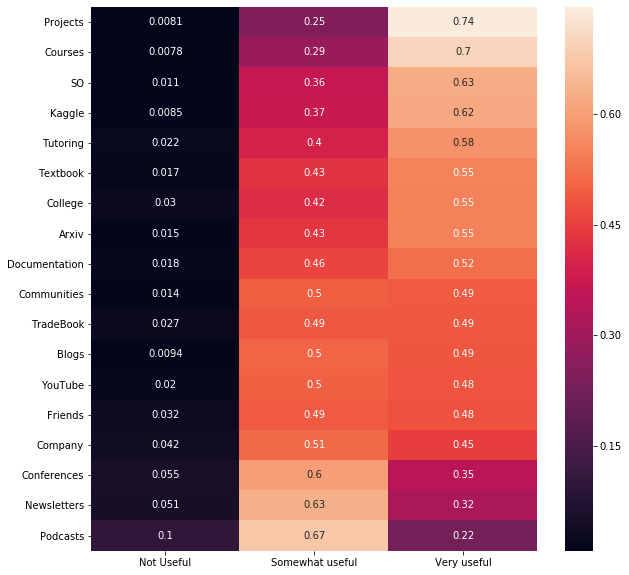

In [0]:
# 학습플랫폼과 유용함 연관성
fdf = {}
for feature in use_features:
  a = mcq[feature].value_counts()
  a = a / a.sum() # percent
  # feature is prefixed 'LearningPlatformUsefulness'
  # slicing prefix and use it as key
  fdf[feature[len('LearningPlatformUsefulness'):]] = a

print(fdf.keys())

# dict to dataframe
# keys of dict = cols of dataframe / values of dict = rows of dataframe
fdf = pd.DataFrame(fdf)
print(fdf)
fdf = fdf.transpose().sort_values('Very useful', ascending=False)
print(fdf)

# heatmap for learning platform usefulness
plt.figure(figsize=(10,10))
sns.heatmap(fdf, annot=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

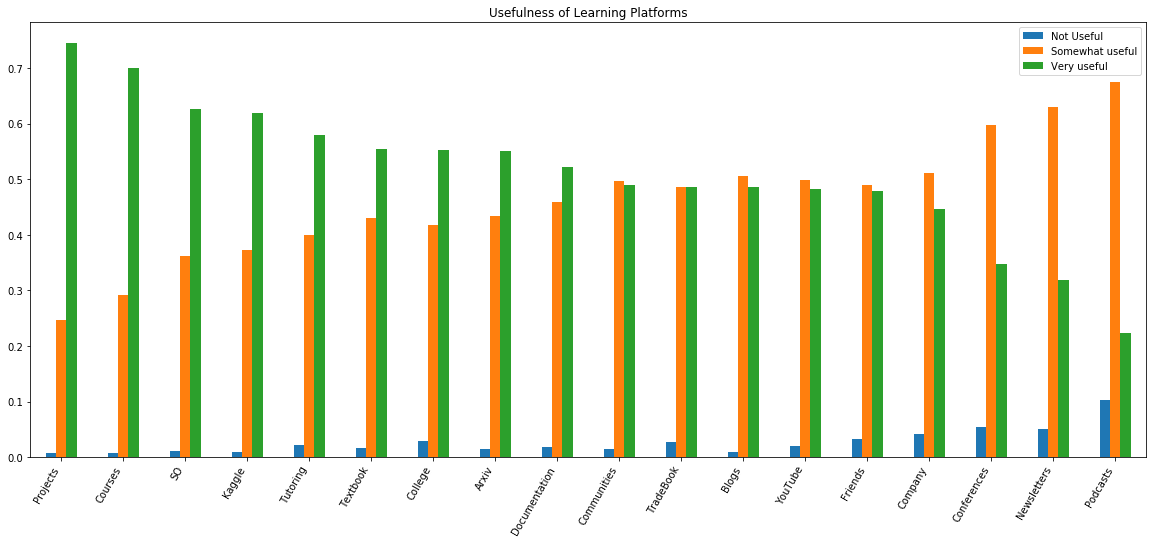

In [0]:
# dataframe plot
fdf.plot(kind='bar', figsize=(20,8),
         title='Usefulness of Learning Platforms')
plt.xticks(rotation=60, ha='right')

In [0]:
cat_features = [x for x in mcq.columns if x.find('LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [0]:
cdf = {}
print(mcq['LearningCategoryKaggle'])
for feature in cat_features:
  cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()

# for drawing Pie Chart
# dict to Series
cdf = pd.Series(cdf)
cdf

0         0.0
1        30.0
2         0.0
3         0.0
4         0.0
         ... 
16711     0.0
16712    10.0
16713     NaN
16714     NaN
16715     NaN
Name: LearningCategoryKaggle, Length: 16716, dtype: float64


SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

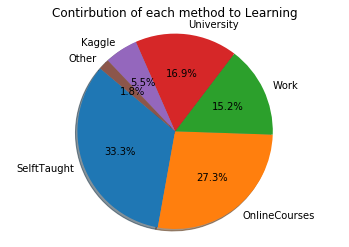

In [0]:
plt.pie(cdf, labels=cdf.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Contirbution of each method to Learning')
plt.show()

### Q4. 데이터 사이언스를 위해 높은 사양이 필요한가요?

In [0]:
qc = question.loc[question['Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [0]:
# how many response which is not null
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].shape

(4206,)

In [0]:
mcq['HardwarePersonalProjectsSelect'] = mcq['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x: x.split(','))

s = mcq.apply(lambda x: pd.Series(x['HardwarePersonalProjectsSelect']),
              axis=1).stack().reset_index(level=1, drop=True)

s.name = 'hardware'
s.head()

0                       nan
1                       nan
2    Basic laptop (Macbook)
3                       nan
4                       nan
Name: hardware, dtype: object

In [0]:
s = s[s != 'nan']
s.head()

2                                Basic laptop (Macbook)
7                                Basic laptop (Macbook)
7             Gaming Laptop (Laptop + CUDA capable GPU)
10    Laptop or Workstation and local IT supported s...
12                               Basic laptop (Macbook)
Name: hardware, dtype: object

In [0]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
GCE ...),669
Laptop + Cloud service (AWS,669
Azure,669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


### Q5. 데이터 사이언스 공부에 얼마나 많은 시간을 사용하는지?

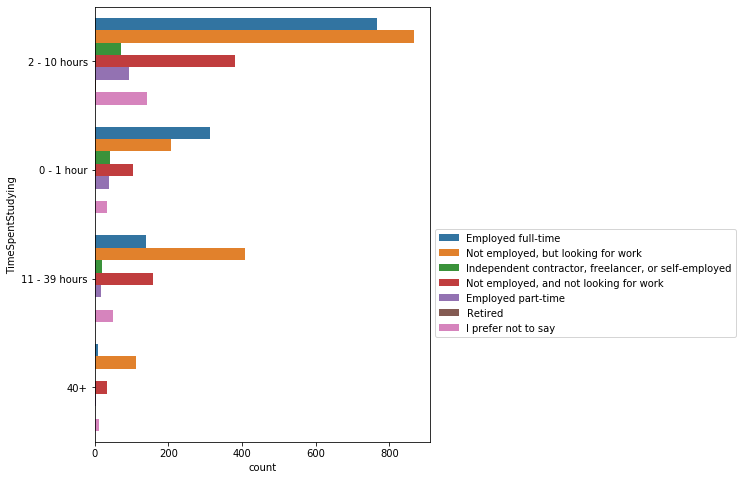

In [0]:
plt.figure(figsize=(6,8))
sns.countplot(y='TimeSpentStudying',
              data=mcq,
              hue='EmploymentStatus'
              ).legend(loc='center_left',
                       bbox_to_anchor=(1, 0.5))

In [0]:
full_time = mcq.loc[mcq['EmploymentStatus'] == 'Employed full-time']
print(full_time.shape)
looking_for_job = mcq.loc[mcq['EmploymentStatus'] == 'Not employed, but looking for work']
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


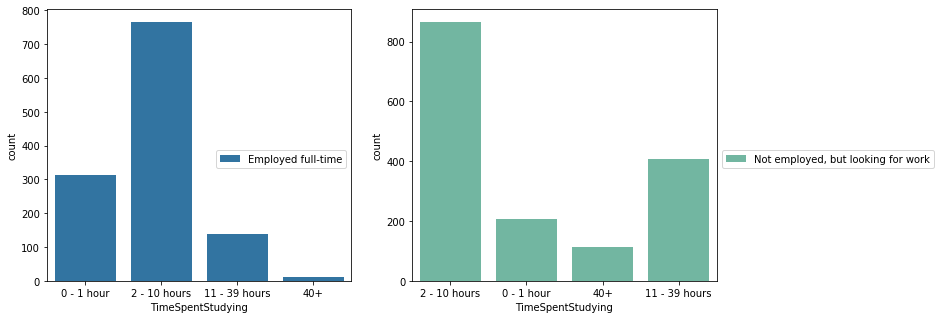

In [0]:
# full-time과 looking for work 공부 시간 비교
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12, 5)
sns.countplot(x='TimeSpentStudying',
              data=full_time,
              hue='EmploymentStatus', ax=ax1
              ).legend(loc='center_right',
                       bbox_to_anchor=(1, 0.5))
              
sns.countplot(x='TimeSpentStudying',
              data=looking_for_job,
              hue='EmploymentStatus', ax=ax2,
              palette='Set2'
              ).legend(loc='center_right',
                       bbox_to_anchor=(1, 0.5))

### Q6. 블로그, 팟캐스트, 수업, 기타 등등 추천

In [0]:
mcq['BlogsPodcastsNewslettersSelect'] = mcq['BlogsPodcastsNewslettersSelect'].astype(str).apply(lambda x: x.split(','))
mcq['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [0]:
s = mcq.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platforms'
s.head()

0    Becoming a Data Scientist Podcast
0              Data Machina Newsletter
0             O'Reilly Data Newsletter
0         Partially Derivative Podcast
0           R Bloggers Blog Aggregator
Name: platforms, dtype: object

In [0]:
s = s[s != 'nan'].value_counts().head(20)
s

KDnuggets Blog                                       2650
R Bloggers Blog Aggregator                           2046
O'Reilly Data Newsletter                             1604
Becoming a Data Scientist Podcast                    1299
Other (Separate different answers with semicolon)    1296
No Free Hunch Blog                                   1238
Siraj Raval YouTube Channel                          1040
FastML Blog                                           729
Statistical Modeling                                  662
 Causal Inference                                     662
 and Social Science Blog (Andrew Gelman)              662
Data Machina Newsletter                               660
The Data Skeptic Podcast                              567
Talking Machines Podcast                              473
Data Elixir Newsletter                                447
FlowingData Blog                                      392
Linear Digressions Podcast                            369
Data Stories P

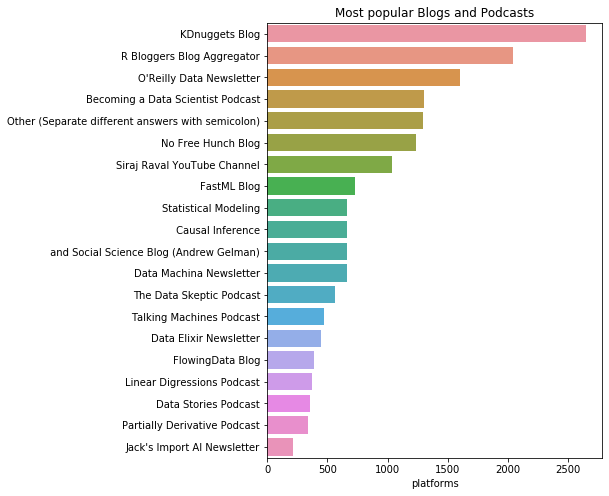

In [0]:
plt.figure(figsize=(6, 8))
plt.title('Most popular Blogs and Podcasts')
sns.barplot(y=s.index, x=s)

In [0]:
print(mcq['CoursePlatformSelect'].head())
mcq['CoursePlatformSelect'] = mcq['CoursePlatformSelect'].astype(str).apply(lambda x: x.split(','))
print(mcq['CoursePlatformSelect'].head())

0             NaN
1             NaN
2    Coursera,edX
3             NaN
4             NaN
Name: CoursePlatformSelect, dtype: object
0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object


In [0]:
tt = mcq.apply(lambda x: pd.Series(x['CoursePlatformSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
tt.name = 'course'
tt.head(20)

0          nan
1          nan
2     Coursera
2          edX
3          nan
4          nan
5          nan
6          nan
7     Coursera
8          nan
9          nan
10    Coursera
11         nan
12    Coursera
12    DataCamp
12         edX
13         nan
14         nan
15         nan
16         nan
Name: course, dtype: object

In [0]:
tt = tt[tt != 'nan'].value_counts()
tt

Coursera    1725
Udacity      805
edX          710
DataCamp     638
Other        356
Name: course, dtype: int64

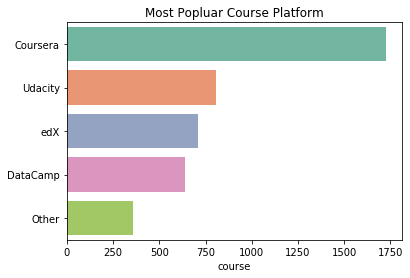

In [0]:
plt.title('Most Popluar Course Platform')
sns.barplot(y=tt.index, x=tt, palette='Set2')

### Q7. 데이터 사이언스 직무에서 가장 중요한 스킬은?

In [0]:
job_features = [x for x in mcq.columns if x.find('JobSkillImportance') != -1 
                and x.find('JobSkillImportanceOther') == -1]
job_features

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [0]:
jdf = {}
for feature in job_features:
  a = mcq[feature].value_counts()
  a = a / a.sum()
  jdf[feature[len('JobSkillImportance'):]] = a

jdf

{'BigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'Degree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'EnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'KaggleRanking': Nice to have    0.677261
 Unnecessary     0.203876
 Necessary       0.118863
 Name: JobSkillImportanceKaggleRanking, dtype: float64,
 'MOOC': Nice to have    0.606994
 Unnecessary     0.285752
 Necessary       0.107255
 Name: JobSkillImportanceMOOC, dtype: float64,
 'Python': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'R': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'SQL': Nice to have 

In [0]:
jdf = pd.DataFrame(jdf).transpose()
jdf

,Necessary,Nice to have,Unnecessary
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
Stats,0.513889,0.457576,0.028535
EnterpriseTools,0.144829,0.564970,0.290200
Python,0.645994,0.327214,0.026792
R,0.414807,0.513945,0.071247
SQL,0.434224,0.491778,0.073998
KaggleRanking,0.118863,0.677261,0.203876
MOOC,0.107255,0.606994,0.285752
Visualizations,0.455392,0.490820,0.053788


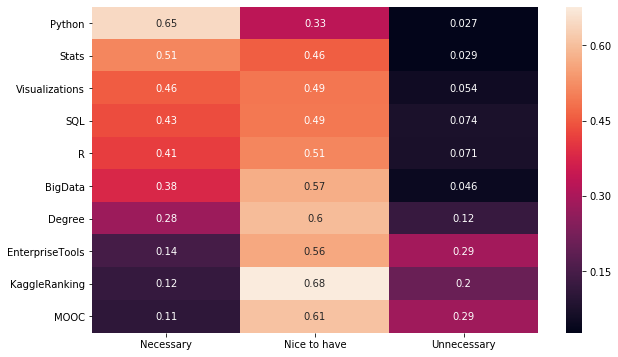

In [0]:
plt.figure(figsize=(10,6))
sns.heatmap(jdf.sort_values('Necessary', ascending=False), annot=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

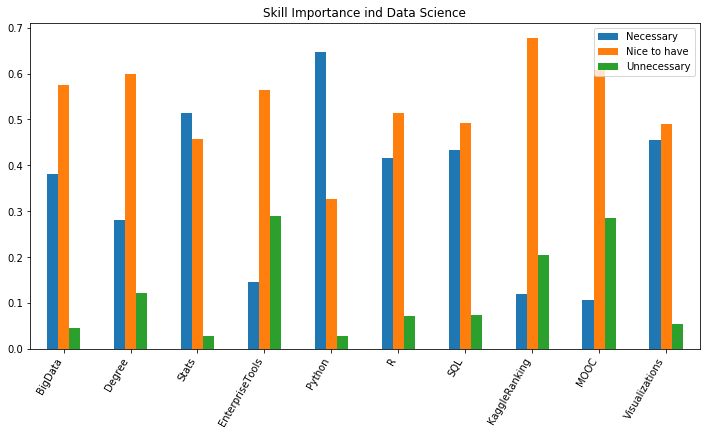

In [0]:
jdf.plot(kind='bar', figsize=(12,6),
         title='Skill Importance ind Data Science')
plt.xticks(rotation=60, ha='right')

### Q8. 데이터 사이언티스트의 평균 급여는?

In [6]:
mcq[mcq['CompensationAmount'].notnull()].shape
mcq['CompensationAmount'][:20]

0         NaN
1         NaN
2         NaN
3     250,000
4         NaN
5         NaN
6         NaN
7         NaN
8       80000
9     1200000
10        NaN
11     95,000
12        NaN
13        NaN
14    1100000
15    120,000
16        NaN
17        NaN
18        NaN
19        NaN
Name: CompensationAmount, dtype: object

In [32]:
mcq['CompensationAmount'] = mcq['CompensationAmount'].str.replace(',', '')
mcq['CompensationAmount'] = mcq['CompensationAmount'].str.replace('-', '')

# 환율계산 정보
rates = pd.read_csv((os.path.join(data_root_dir, 'kaggle-survey-2017/conversionRates.csv')))
rates.drop('Unnamed: 0', axis=1, inplace=True)

salary = mcq[['CompensationAmount', 'CompensationCurrency', 'GenderSelect',
              'Country', 'CurrentJobTitleSelect']].dropna()
print(salary.head(10))
print(rates.head(10))

# https://datascienceschool.net/view-notebook/7002e92653434bc88c8c026c3449d27b/
salary = salary.merge(rates,left_on='CompensationCurrency',
                      right_on='originCountry', how='left')
salary['Salary'] = pd.to_numeric(
    salary['CompensationAmount']) * salary['exchangeRate']
  
salary

   CompensationAmount  ...                 CurrentJobTitleSelect
3              250000  ...      Operations Research Practitioner
8               80000  ...                      Business Analyst
9             1200000  ...  Software Developer/Software Engineer
11              95000  ...                        Data Scientist
14            1100000  ...  Software Developer/Software Engineer
21              20000  ...                            Researcher
22             100000  ...                  Scientist/Researcher
23              20000  ...                                 Other
25             624000  ...                          Data Analyst
27          156000000  ...                        Data Scientist

[10 rows x 5 columns]
  originCountry  exchangeRate
0           USD      1.000000
1           EUR      1.195826
2           INR      0.015620
3           GBP      1.324188
4           BRL      0.321350
5           RUB      0.017402
6           CAD      0.823688
7           AUD      0

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.000
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.800
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.400
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.900
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.400
...,...,...,...,...,...,...,...,...
4362,50000,USD,Male,Other,DBA/Database Engineer,USD,1.000000,50000.000
4363,84000,EUR,Male,Germany,Software Developer/Software Engineer,EUR,1.195826,100449.384
4364,200000,USD,Male,United States,Data Scientist,USD,1.000000,200000.000
4365,75000,EUR,Male,Norway,Data Analyst,EUR,1.195826,89686.950


In [9]:
print('Maximum Salary is USD $', salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $', salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $', salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 28297400000
Minimum Salary is USD $ 0
Median Salary is USD $ 53812.0


Text(0.5, 1.0, 'Salary Distribution')

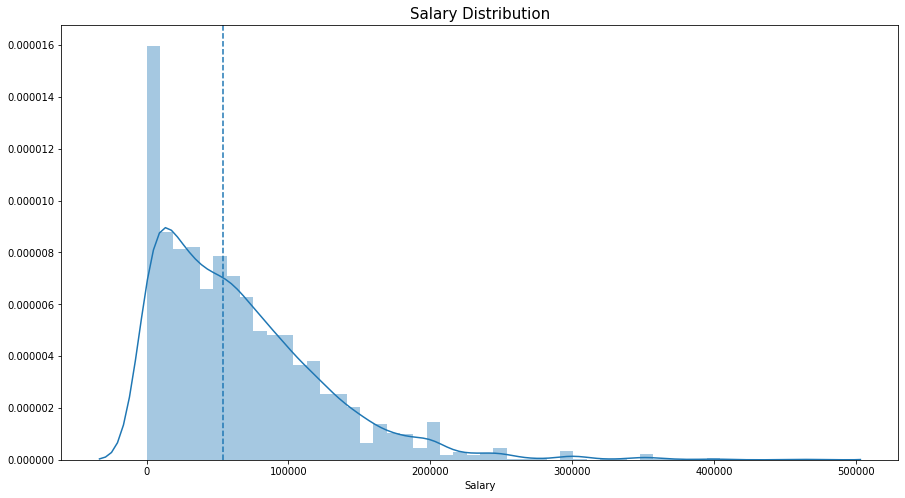

In [10]:
plt.subplots(figsize=(15,8))
salary_under_5m = salary[salary['Salary']<500000]
sns.distplot(salary_under_5m['Salary'])
plt.axvline(salary_under_5m['Salary'].median(), linestyle='dashed')
plt.title('Salary Distribution', size=15)

                                  Salary
Country                                 
United States                108000.0000
Switzerland                  104338.2000
Australia                     93469.1150
Norway                        87875.4000
Denmark                       80365.0000
Israel                        74852.5680
Netherlands                   74141.2120
Sweden                        72803.4480
Germany                       71749.5600
Canada                        70013.4800
Ireland                       66667.2995
United Kingdom                66209.4000
Japan                         63756.0000
New Zealand                   61863.0850
Singapore                     58144.7187
Belgium                       57399.6480
France                        53812.1700
Finland                       47833.0400
South Africa                  46201.2000
Italy                         45441.3880
Spain                         43049.7360
Hong Kong                     37631.4120
Republic of Chin

Text(0.5, 1.0, 'Highest Salary Paying Country')

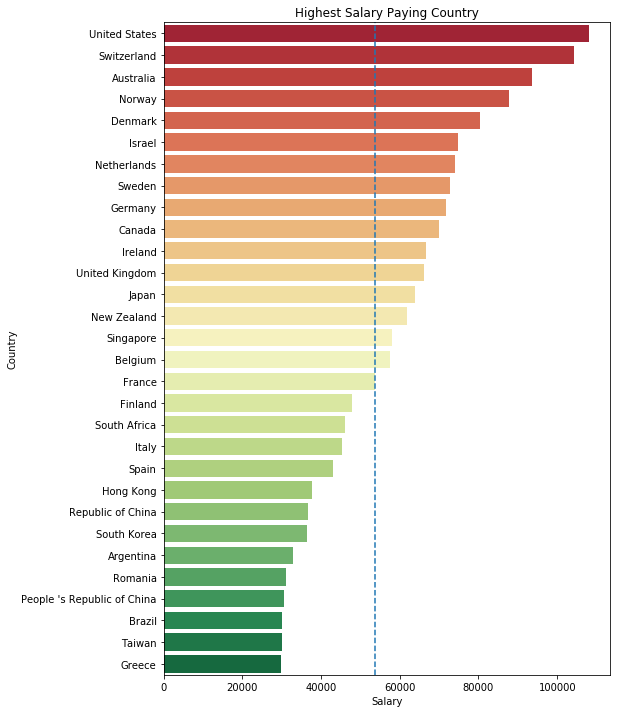

In [19]:
plt.subplots(figsize=(8,12))
# https://www.geeksforgeeks.org/python-pandas-series-to_frame/
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_frame.html
salary_country = salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:30].to_frame()
print(salary_country)

# from data(salary_country), data['Salary] series is used for x axis and index is used for y axis
sns.barplot('Salary', salary_country.index, data=salary_country, palette='RdYlGn')
plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Highest Salary Paying Country')

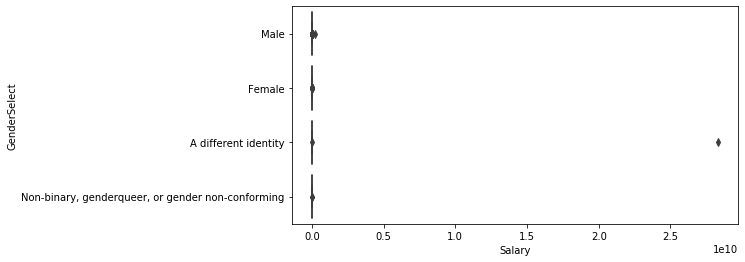

In [29]:
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect', x='Salary', data=salary)

     CompensationAmount CompensationCurrency  ... exchangeRate      Salary
85             40000000                  KRW  ...     0.000886   35440.000
147               80000                  USD  ...     1.000000   80000.000
314               60000                  USD  ...     1.000000   60000.000
333            60000000                  KRW  ...     0.000886   53160.000
479               30000                  KRW  ...     0.000886      26.580
562            50000000                  KRW  ...     0.000886   44300.000
769            42000000                  KRW  ...     0.000886   37212.000
799                1000                  KRW  ...     0.000886       0.886
1060           75000000                  KRW  ...     0.000886   66450.000
1360           30000000                  KRW  ...     0.000886   26580.000
1568              90000                  SGD  ...     0.742589   66833.010
1576           10800000                  KRW  ...     0.000886    9568.800
1905              20000  

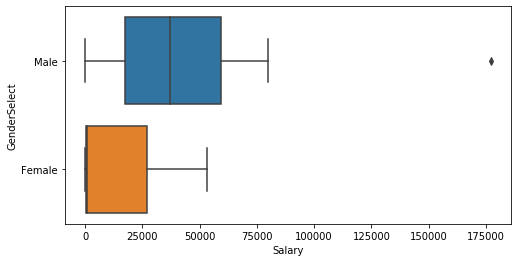

In [34]:
salary_korea = salary.loc[salary['Country'] == 'South Korea']
print(salary_korea)
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect',x='Salary',data=salary_korea)

In [35]:
salary_korea.shape

(26, 8)

In [36]:
salary_korea[salary_korea['GenderSelect'] == 'Female']

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
479,30000,KRW,Female,South Korea,Data Analyst,KRW,0.000886,26.58
2903,800000,KRW,Female,South Korea,Researcher,KRW,0.000886,708.80
4063,60000000,KRW,Female,South Korea,Researcher,KRW,0.000886,53160.00


In [38]:
salary_korea_male = salary_korea[salary_korea['GenderSelect'] == 'Male']
salary_korea_male['Salary'].describe()

count        23.000000
mean      43540.617217
std       37800.608484
min           0.886000
25%       17500.000000
50%       37212.000000
75%       59238.000000
max      177200.000000
Name: Salary, dtype: float64

In [39]:
salary_korea_male

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
85,40000000,KRW,Male,South Korea,Business Analyst,KRW,0.000886,35440.000
147,80000,USD,Male,South Korea,Researcher,USD,1.000000,80000.000
314,60000,USD,Male,South Korea,Business Analyst,USD,1.000000,60000.000
333,60000000,KRW,Male,South Korea,Researcher,KRW,0.000886,53160.000
562,50000000,KRW,Male,South Korea,Researcher,KRW,0.000886,44300.000
769,42000000,KRW,Male,South Korea,Software Developer/Software Engineer,KRW,0.000886,37212.000
799,1000,KRW,Male,South Korea,Machine Learning Engineer,KRW,0.000886,0.886
1060,75000000,KRW,Male,South Korea,Scientist/Researcher,KRW,0.000886,66450.000
1360,30000000,KRW,Male,South Korea,Statistician,KRW,0.000886,26580.000
1568,90000,SGD,Male,South Korea,Computer Scientist,SGD,0.742589,66833.010


### Q8. 개인프로젝트나 학습용 데이터를 어디서 얻나요?

In [7]:
# https://stackoverflow.com/questions/37561991/what-is-dtypeo
print(mcq['PublicDatasetsSelect'].dtype)
mcq['PublicDatasetsSelect'] = mcq['PublicDatasetsSelect'].astype(str).apply(lambda x: x.split(','))

object


In [0]:
q = mcq.apply(lambda x: pd.Series(x['PublicDatasetsSelect']), axis=1).stack().reset_index(level=1, drop=True)
q.name = 'courses'

In [9]:
q = q[q != 'nan'].value_counts()
q

Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.)    6843
Google Search                                                                 3600
University/Non-profit research group websites                                 2873
I collect my own data (e.g. web-scraping)                                     2560
GitHub                                                                        2400
Government website                                                            2079
Other                                                                          399
Name: courses, dtype: int64

In [10]:
pd.DataFrame(q)

,courses
Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.),6843
Google Search,3600
University/Non-profit research group websites,2873
I collect my own data (e.g. web-scraping),2560
GitHub,2400
Government website,2079
Other,399


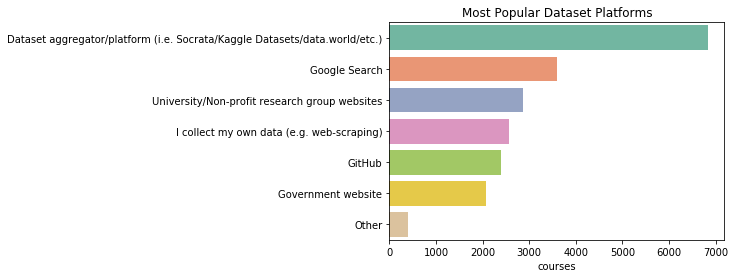

In [11]:
plt.title('Most Popular Dataset Platforms')
sns.barplot(y=q.index, x=q, palette='Set2')

In [13]:
# 주관식 응답을 읽어온다.
ff = pd.read_csv(os.path.join(data_root_dir, 'kaggle-survey-2017/freeformResponses.csv'), 
                 encoding="ISO-8859-1", low_memory=False)
ff.shape

(16716, 62)

In [18]:
# 설문내용과 누구에게 물어봤는가
qc = question.loc[question['Column'].str.contains('PersonalProjectsChallengeFreeForm')]
print(qc.shape)
print(qc)
qc.Question.values[0]

(1, 3)
                               Column  ... Asked
22  PersonalProjectsChallengeFreeForm  ...   All

[1 rows x 3 columns]


'What is your biggest challenge with the public datasets you find for personal projects?'

#### 개인 프로젝트에서 공개된 데이터 셋을 다루는 데 가장 어려운 점은?

In [19]:
ppcff = ff['PersonalProjectsChallengeFreeForm'].value_counts().head(15)
ppcff.name = '응답 수'
pd.DataFrame(ppcff)

,응답 수
None,23
Cleaning the data,20
Cleaning,20
Dirty data,16
Data Cleaning,14
none,13
dirty data,10
Data cleaning,10
Size,9
-,9


### Q9. 데이터 사이언스 업무에서 가장 많은 시간을 필요로 하는 일은?

In [21]:
time_features = [x for x in mcq.columns if x.find('Time') != -1][4:10]
time_features

['TimeGatheringData',
 'TimeModelBuilding',
 'TimeProduction',
 'TimeVisualizing',
 'TimeFindingInsights',
 'TimeOtherSelect']

GatheringData      36.144754
ModelBuilding      21.268066
Production         10.806372
Visualizing        13.869372
FindingInsights    13.094776
OtherSelect         2.396247
dtype: float64


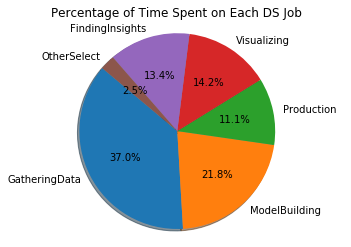

In [23]:
tdf = {}
for feature in time_features:
  tdf[feature[len('Time'):]] = mcq[feature].mean()

# dictionary to series
tdf = pd.Series(tdf)
print(tdf)

plt.pie(tdf, labels=tdf.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of Time Spent on Each DS Job")
plt.show()

### Q10. 데이터 사이언스 직업을 찾는 데 가장 고려해야 할 요소는?

In [26]:
qc = question.loc[question['Column'].str.contains('JobFactor')]
print(qc.shape)
print(qc.columns)
print(qc)
qc.Question.values

(16, 3)
Index(['Column', 'Question', 'Asked'], dtype='object')
                             Column  ...     Asked
274               JobFactorLearning  ...  Learners
275                 JobFactorSalary  ...  Learners
276                 JobFactorOffice  ...  Learners
277              JobFactorLanguages  ...  Learners
278                JobFactorCommute  ...  Learners
279             JobFactorManagement  ...  Learners
280        JobFactorExperienceLevel  ...  Learners
281             JobFactorDepartment  ...  Learners
282                  JobFactorTitle  ...  Learners
283         JobFactorCompanyFunding  ...  Learners
284                 JobFactorImpact  ...  Learners
285                 JobFactorRemote  ...  Learners
286               JobFactorIndustry  ...  Learners
287       JobFactorLeaderReputation  ...  Learners
288              JobFactorDiversity  ...  Learners
289  JobFactorPublishingOpportunity  ...  Learners

[16 rows x 3 columns]


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [27]:
job_factors = [x for x in mcq.columns if x.find('JobFactor') != -1]
job_factors

['JobFactorLearning',
 'JobFactorSalary',
 'JobFactorOffice',
 'JobFactorLanguages',
 'JobFactorCommute',
 'JobFactorManagement',
 'JobFactorExperienceLevel',
 'JobFactorDepartment',
 'JobFactorTitle',
 'JobFactorCompanyFunding',
 'JobFactorImpact',
 'JobFactorRemote',
 'JobFactorIndustry',
 'JobFactorLeaderReputation',
 'JobFactorDiversity',
 'JobFactorPublishingOpportunity']

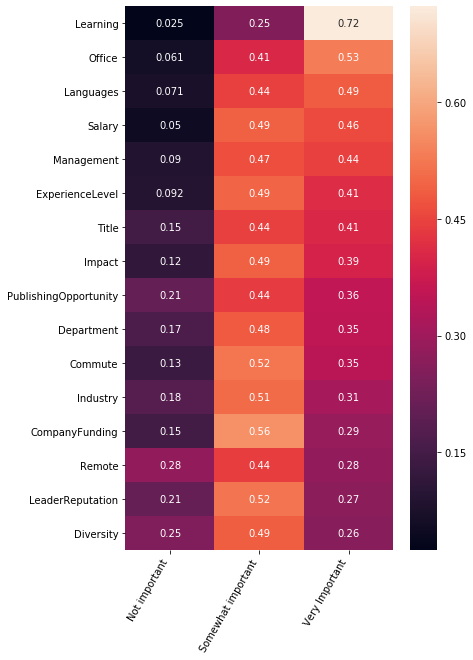

In [31]:
jfdf = {}
for feature in job_factors:
  a = mcq[feature].value_counts()
  a = a / a.sum()
  jfdf[feature[len('JobFactor'):]] = a

jfdf = pd.DataFrame(jfdf).transpose()

plt.figure(figsize=(6,10))
plt.xticks(rotation=60, ha='right')
sns.heatmap(jfdf.sort_values('Very Important', ascending=False), annot=True)

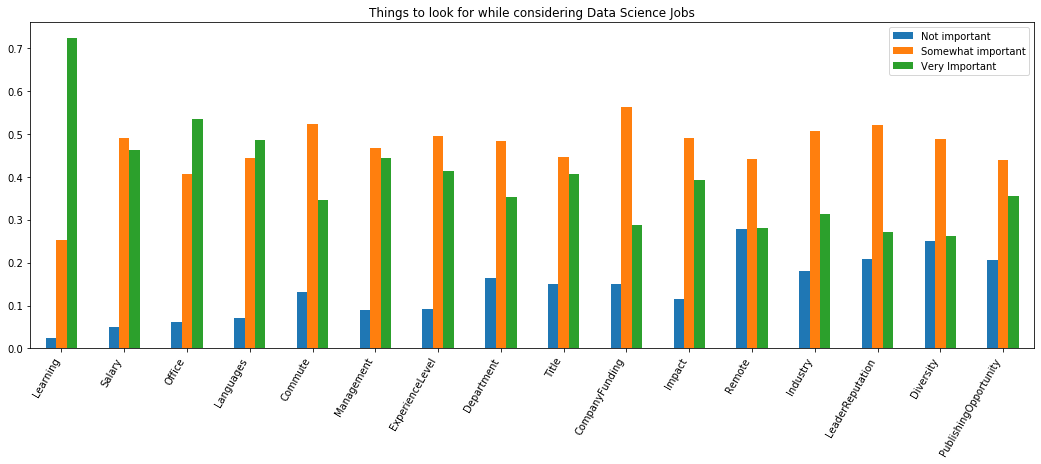

In [33]:
jfdf.plot(kind='bar', figsize=(18,6),
          title="Things to look for while considering Data Science Jobs")
plt.xticks(rotation=60, ha='right')
plt.show()

### Q11. 데이터 사이언티스트가 되기 위해 학위가 중요할까요?

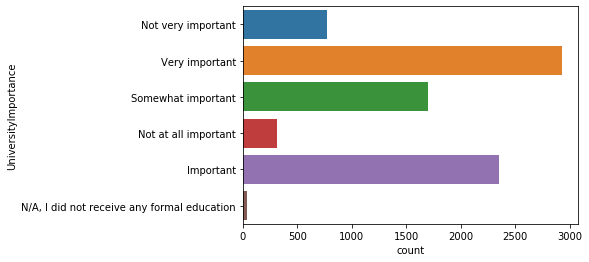

In [34]:
sns.countplot(y='UniversityImportance', data=mcq)

### Q12. 어디서부터 데이터 사이언스를 시작해야 할까요?

In [35]:
mcq[mcq['FirstTrainingSelect'].notnull()].shape

(14712, 228)

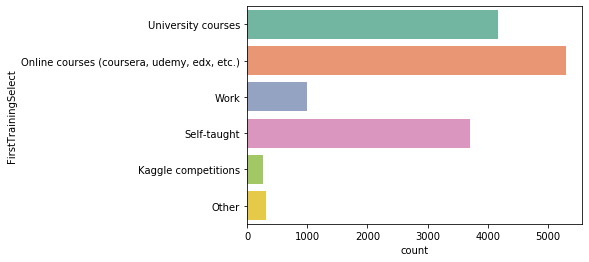

In [36]:
sns.countplot(y='FirstTrainingSelect', data=mcq, palette='Set2')

### Q13. 데이터 사이언티스트 이력서에서 가장 중요한 것은 무엇일까요?

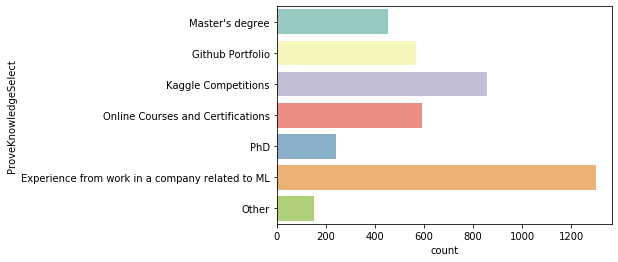

In [38]:
sns.countplot(y='ProveKnowledgeSelect', data=mcq, palette='Set3')

### Q14. 머신러닝 알고리즘을 사용하기 위해 수학이 필요할까요?

In [39]:
qc = question.loc[question['Column'].str.contains('AlgorithmUnderstandingLevel')]
qc

,Column,Question,Asked
227,AlgorithmUnderstandingLevel,At which level do you understand the mathemati...,CodingWorker


In [40]:
mcq[mcq['AlgorithmUnderstandingLevel'].notnull()].shape

(7410, 228)

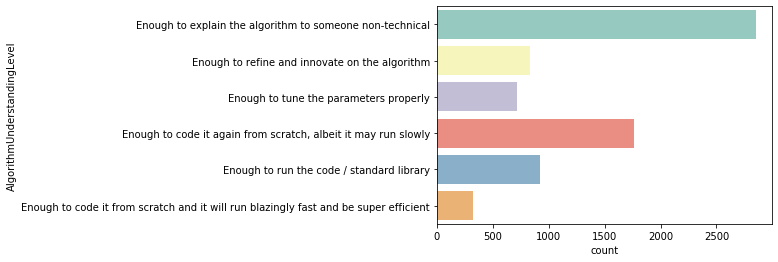

In [41]:
sns.countplot(y='AlgorithmUnderstandingLevel', data=mcq, palette='Set3')

### Q15. 어디에서 일을 찾아야 할까요?

In [42]:
question.loc[question['Column'].str.contains('JobSearchResource|EmployerSearchMethod')]

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


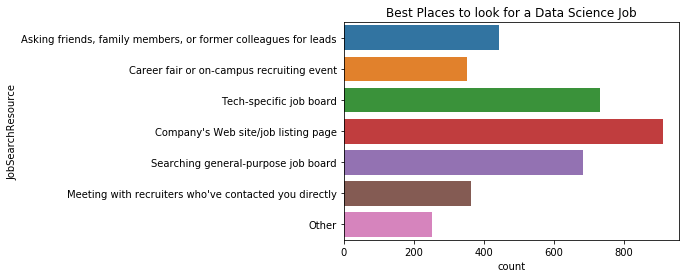

In [43]:
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=mcq)

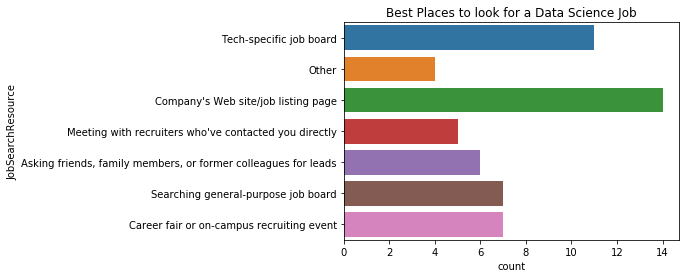

In [46]:
korea = mcq.loc[(mcq['Country']=='South Korea')]
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=korea)

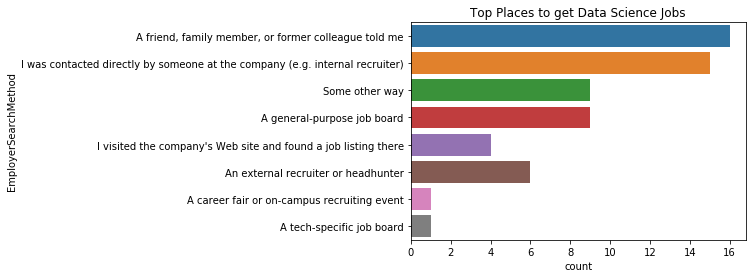

In [47]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=korea)